In [21]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [22]:
def val_extractor(file_name1, file_name2, file_name3):    
    
    test_accuracy_seed1 = 0
    sparsity_average_seed1 = 0
    selectivity_average_seed1 = 0
    
    test_accuracy_seed2 = 0
    sparsity_average_seed2 = 0
    selectivity_average_seed2 = 0
    
    test_accuracy_seed3 = 0
    sparsity_average_seed3 = 0
    selectivity_average_seed3 = 0
    
    # index 0 --> test acc (list)
    # index 1 --> sparsity (list) 
    # index 3 --> selectivity (value)
    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed1 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed1 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed1 = ast.literal_eval(line)
                
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed2 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed2 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed2 = ast.literal_eval(line)
                
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed3 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed3 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed3 = ast.literal_eval(line)
                
    test_accuracy_seed1 = test_accuracy_seed1[:5]
    sparsity_average_seed1 = sparsity_average_seed1[:5]
    selectivity_average_seed1 = selectivity_average_seed1[:5]
    
    test_accuracy_seed2 = test_accuracy_seed2[:5]
    sparsity_average_seed2 = sparsity_average_seed2[:5]
    selectivity_average_seed2 = selectivity_average_seed2[:5]
    
    test_accuracy_seed3 = test_accuracy_seed3[:5]
    sparsity_average_seed3 = sparsity_average_seed3[:5]
    selectivity_average_seed3 = selectivity_average_seed3[:5]
    
    acc_avg = list()
    acc_se  = list()

    spar_avg = list()
    spar_se  = list()

    selec_avg = list()
    selec_se  = list()

    for i in range(len(test_accuracy_seed1)):
        acc_avg.append(np.mean([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]))
        acc_se .append(np.std ([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]) / np.sqrt(3))

        spar_avg.append(np.mean([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]))
        spar_se .append(np.std ([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]) / np.sqrt(3))

        selec_avg.append(np.mean([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]))
        selec_se .append(np.std ([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]) / np.sqrt(3))
    
                
    return acc_avg, acc_se, spar_avg, spar_se, selec_avg, selec_se

In [23]:
sgd_acc_avg,   sgd_acc_se,     sgd_spar_avg,       sgd_spar_se,         sgd_selec_avg,    sgd_selec_se      = val_extractor('conv_seed1/seed_1_conv_SGD.txt',       'conv_seed100/seed_100_conv_SGD.txt',        'conv_seed1234/seed_1234_conv_SGD.txt')
grad_acc_avg,  grad_acc_se,    grad_spar_avg,      grad_spar_se,        grad_selec_avg,   grad_selec_se     = val_extractor('conv_seed1/seed_1_conv_Adagrad.txt',   'conv_seed100/seed_100_conv_Adagrad.txt',    'conv_seed1234/seed_1234_conv_Adagrad.txt')
delta_acc_avg, delta_acc_se,   delta_spar_avg,     delta_spar_se,       delta_selec_avg,  delta_selec_se    = val_extractor('conv_seed1/seed_1_conv_Adadelta.txt',  'conv_seed100/seed_100_conv_Adadelta.txt',   'conv_seed1234/seed_1234_conv_Adadelta.txt')
adam_acc_avg,  adam_acc_se,    adam_spar_avg,      adam_spar_se,        adam_selec_avg,   adam_selec_se     = val_extractor('conv_seed1/seed_1_conv_Adam.txt',      'conv_seed100/seed_100_conv_Adam.txt',       'conv_seed1234/seed_1234_conv_Adam.txt')

In [24]:
sgd_acc_avg_ori,   sgd_acc_se_ori,     sgd_spar_avg_ori,       sgd_spar_se_ori,         sgd_selec_avg_ori,    sgd_selec_se_ori      = val_extractor('test_seed1/seed_1_sparsity_selectivity_4_optim_testing_SGD.txt',       'test_seed100/seed_100_sparsity_selectivity_4_optim_testing_SGD.txt',        'test_seed1234/seed_1234_sparsity_selectivity_4_optim_testing_SGD.txt')
grad_acc_avg_ori,  grad_acc_se_ori,    grad_spar_avg_ori,      grad_spar_se_ori,        grad_selec_avg_ori,   grad_selec_se_ori     = val_extractor('test_seed1/seed_1_sparsity_selectivity_4_optim_testing_Adagrad.txt',   'test_seed100/seed_100_sparsity_selectivity_4_optim_testing_Adagrad.txt',    'test_seed1234/seed_1234_sparsity_selectivity_4_optim_testing_Adagrad.txt')
delta_acc_avg_ori, delta_acc_se_ori,   delta_spar_avg_ori,     delta_spar_se_ori,       delta_selec_avg_ori,  delta_selec_se_ori    = val_extractor('test_seed1/seed_1_sparsity_selectivity_4_optim_testing_Adadelta.txt',  'test_seed100/seed_100_sparsity_selectivity_4_optim_testing_Adadelta.txt',   'test_seed1234/seed_1234_sparsity_selectivity_4_optim_testing_Adadelta.txt')
adam_acc_avg_ori,  adam_acc_se_ori,    adam_spar_avg_ori,      adam_spar_se_ori,        adam_selec_avg_ori,   adam_selec_se_ori     = val_extractor('test_seed1/seed_1_sparsity_selectivity_4_optim_testing_Adam.txt',      'test_seed100/seed_100_sparsity_selectivity_4_optim_testing_Adam.txt',       'test_seed1234/seed_1234_sparsity_selectivity_4_optim_testing_Adam.txt')

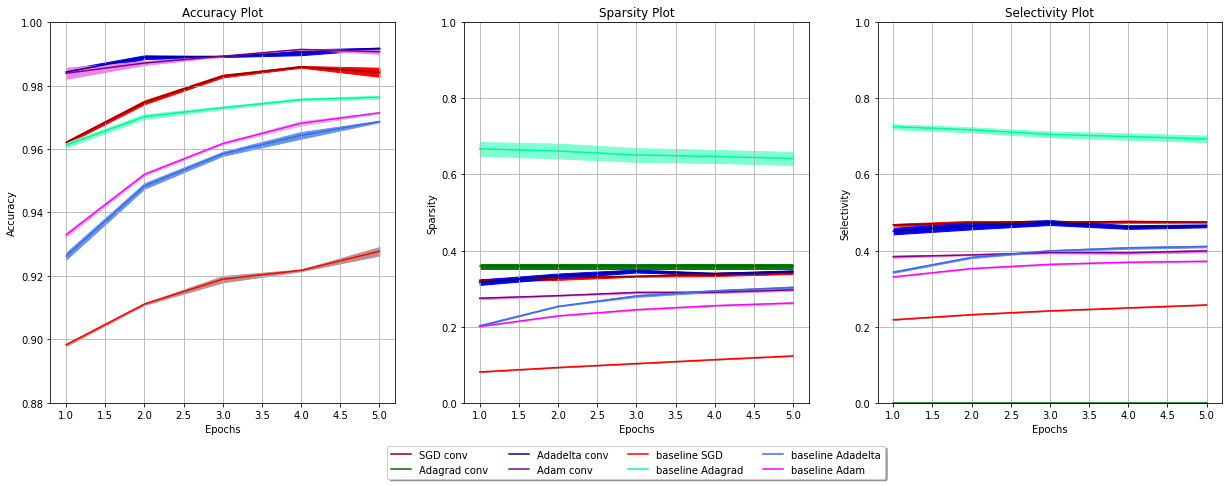

In [50]:
epoch5 = np.linspace(1, 5, 5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# sgd
ax1.plot(epoch5, sgd_acc_avg, c='darkred', label='conv SGD')
ax1.fill_between(epoch5, np.subtract(sgd_acc_avg, sgd_acc_se), np.add(sgd_acc_avg, sgd_acc_se), color='red')
# adagrad
ax1.plot(epoch5, grad_acc_avg, c='darkgreen', label='conv Adagrad')
ax1.fill_between(epoch5, np.subtract(grad_acc_avg, grad_acc_se), np.add(grad_acc_avg, grad_acc_se), color='green')
# adadelta
ax1.plot(epoch5, delta_acc_avg, c='darkblue', label='conv Adadelta')
ax1.fill_between(epoch5, np.subtract(delta_acc_avg, delta_acc_se), np.add(delta_acc_avg, delta_acc_se), color='blue')
# adam
ax1.plot(epoch5, adam_acc_avg, c='purple', label='conv Adam')
ax1.fill_between(epoch5, np.subtract(adam_acc_avg, adam_acc_se), np.add(adam_acc_avg, adam_acc_se), color='violet')

# sgd
ax1.plot(epoch5, sgd_acc_avg_ori, c='red', label='baseline SGD')
ax1.fill_between(epoch5, np.subtract(sgd_acc_avg_ori, sgd_acc_se_ori), np.add(sgd_acc_avg_ori, sgd_acc_se_ori), color='rosybrown')
# adagrad
ax1.plot(epoch5, grad_acc_avg_ori, c='mediumspringgreen', label='baseline Adagrad')
ax1.fill_between(epoch5, np.subtract(grad_acc_avg_ori, grad_acc_se_ori), np.add(grad_acc_avg_ori, grad_acc_se_ori), color='aquamarine')
# adadelta
ax1.plot(epoch5, delta_acc_avg_ori, c='royalblue', label='baseline Adadelta')
ax1.fill_between(epoch5, np.subtract(delta_acc_avg_ori, delta_acc_se_ori), np.add(delta_acc_avg_ori, delta_acc_se_ori), color='cornflowerblue')
# adam
ax1.plot(epoch5, adam_acc_avg_ori, c='magenta', label='baseline Adam')
ax1.fill_between(epoch5, np.subtract(adam_acc_avg_ori, adam_acc_se_ori), np.add(adam_acc_avg_ori, adam_acc_se_ori), color='thistle')

ax1.set_title('Accuracy Plot')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.88, 1])
ax1.grid()

# sparsity 
# sgd
ax2.plot(epoch5, sgd_spar_avg, c='darkred', label='conv SGD')
ax2.fill_between(epoch5, np.subtract(sgd_spar_avg, sgd_spar_se), np.add(sgd_spar_avg, sgd_spar_se), color='red')
# adagrad
ax2.plot(epoch5, grad_spar_avg, c='darkgreen', label='conv Adagrad')
ax2.fill_between(epoch5, np.subtract(grad_spar_avg, grad_spar_se), np.add(grad_spar_avg, grad_spar_se), color='green')
# adadelta
ax2.plot(epoch5, delta_spar_avg, c='darkblue', label='conv Adadelta')
ax2.fill_between(epoch5, np.subtract(delta_spar_avg, delta_spar_se), np.add(delta_spar_avg, delta_spar_se), color='blue')
# adam
ax2.plot(epoch5, adam_spar_avg, c='purple', label='conv Adam')
ax2.fill_between(epoch5, np.subtract(adam_spar_avg, adam_spar_se), np.add(adam_spar_avg, adam_spar_se), color='violet')

# sgd
ax2.plot(epoch5, sgd_spar_avg_ori, c='red', label='baseline SGD')
ax2.fill_between(epoch5, np.subtract(sgd_spar_avg_ori, sgd_spar_se_ori), np.add(sgd_spar_avg_ori, sgd_spar_se_ori), color='rosybrown')
# adagrad
ax2.plot(epoch5, grad_spar_avg_ori, c='mediumspringgreen', label='baseline Adagrad')
ax2.fill_between(epoch5, np.subtract(grad_spar_avg_ori, grad_spar_se_ori), np.add(grad_spar_avg_ori, grad_spar_se_ori), color='aquamarine')
# adadelta
ax2.plot(epoch5, delta_spar_avg_ori, c='royalblue', label='baseline Adadelta')
ax2.fill_between(epoch5, np.subtract(delta_spar_avg_ori, delta_spar_se_ori), np.add(delta_spar_avg_ori, delta_spar_se_ori), color='cornflowerblue')
# adam
ax2.plot(epoch5, adam_spar_avg_ori, c='magenta', label='baseline Adam')
ax2.fill_between(epoch5, np.subtract(adam_spar_avg_ori, adam_spar_se_ori), np.add(adam_spar_avg_ori, adam_spar_se_ori), color='thistle')

ax2.set_title('Sparsity Plot')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Sparsity')
ax2.grid()
ax2.set_ylim([0,1])

# selectivity 
# sgd
ax3.plot(epoch5, sgd_selec_avg, c='darkred', label='SGD conv')
ax3.fill_between(epoch5, np.subtract(sgd_selec_avg, sgd_selec_se), np.add(sgd_selec_avg, sgd_selec_se), color='red')
# adagrad
ax3.plot(epoch5, grad_selec_avg, c='darkgreen', label='Adagrad conv')
ax3.fill_between(epoch5, np.subtract(grad_selec_avg, grad_selec_se), np.add(grad_selec_avg, grad_selec_se), color='green')
# adadelta
ax3.plot(epoch5, delta_selec_avg, c='darkblue', label='Adadelta conv')
ax3.fill_between(epoch5, np.subtract(delta_selec_avg, delta_selec_se), np.add(delta_selec_avg, delta_selec_se), color='blue')
# adam
ax3.plot(epoch5, adam_selec_avg, c='purple', label='Adam conv')
ax3.fill_between(epoch5, np.subtract(adam_selec_avg, adam_selec_se), np.add(adam_selec_avg, adam_selec_se), color='violet')

# sgd
ax3.plot(epoch5, sgd_selec_avg_ori, c='red', label='baseline SGD')
ax3.fill_between(epoch5, np.subtract(sgd_selec_avg_ori, sgd_selec_se_ori), np.add(sgd_selec_avg_ori, sgd_selec_se_ori), color='rosybrown')
# adagrad
ax3.plot(epoch5, grad_selec_avg_ori, c='mediumspringgreen', label='baseline Adagrad')
ax3.fill_between(epoch5, np.subtract(grad_selec_avg_ori, grad_selec_se_ori), np.add(grad_selec_avg_ori, grad_selec_se_ori), color='aquamarine')
# adadelta
ax3.plot(epoch5, delta_selec_avg_ori, c='royalblue', label='baseline Adadelta')
ax3.fill_between(epoch5, np.subtract(delta_selec_avg_ori, delta_selec_se_ori), np.add(delta_selec_avg_ori, delta_selec_se_ori), color='cornflowerblue')
# adam
ax3.plot(epoch5, adam_selec_avg_ori, c='magenta', label='baseline Adam')
ax3.fill_between(epoch5, np.subtract(adam_selec_avg_ori, adam_selec_se_ori), np.add(adam_selec_avg_ori, adam_selec_se_ori), color='thistle')


ax3.set_title('Selectivity Plot')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Selectivity')
ax3.grid()
ax3.set_ylim([0,1])

ax3.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.1),
          fancybox=True, shadow=True, ncol=4)